# Introduction to Image Analysis with Python.

Please approach each exercise in order. You may work with other members of the course if you like. This practical is not assessed although some of the skills will be required for your practical project next week. If you are stuck at any stage please ask a demonstrator.

Dominic Waithe 2015 (c)

## Reading images

Exercise: Explore how to open simple tiff images using the PIL library.


Populating the interactive namespace from numpy and matplotlib
('image dimensions', (256, 256), ' im dtype:', dtype('uint8'))


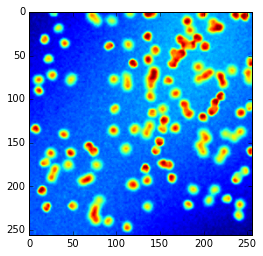

In [2]:
#This line is very important: (It turns on inline the visuals!)
%pylab inline
#This library is one of the libraries one can use for importing tiff files.
#For detailed info:http://effbot.org/imagingbook/image.htm
from PIL import Image

#We import our cell_fluorescent.tif image
im = Image.open('cell_fluorescent.tif')


#This line converts our image object into a numpy array (matrix).
im_array = np.array(im)
#Notice the dimensions and data type.
print('image dimensions',im_array.shape, ' im dtype:',im_array.dtype)

#This is an inline visual. It displays it after your code.
imshow(im_array)
#Notice the scale on the side of the image. What happens when you index a range.
#imshow(im_array[50:100,:])
#Or what happens when you index every fifth pixel:
#imshow(im_array[::5,::5],interpolation='nearest')
#Notice interpolation. What do you thing this is doing?


In [ ]:
#Repeat the above step but for the image cell_colony.tif.
#Experiment with changing the look-up-table:
#imshow(im_array, cmap="Reds")
#more colors at: http://matplotlib.org/examples/color/colormaps_reference.html

## Reading a multi-page tiff

Exercise: Explore how to access different slices and find the dimensions.

('image dimensions', (27, 226, 186), ' im dtype:', dtype('uint8'))
('image dimensions', (226, 186))


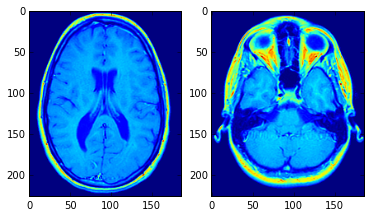

In [3]:
#Make sure you have previously run %pylab inline at least once.
#This library is another one of the libaries we can use to import tiff files
#It also works with formats such as .lsm which are tiff's in disguise.
from tifffile import imread as imreadtiff

#We import our mri-stack.tif image file.
im = imreadtiff('mri-stack.tif')
#Notice the dimensions and data type.
print('image dimensions',im.shape, ' im dtype:',im.dtype)

#This line converts our image object into a numpy array and then accesses the fifteenth slice.
im_slice = im[15,:,:]

#This activates a subplot which can be used to display more than one image in a grid.
subplot(1,2,1)
imshow(im_slice)

#We can also assess the raw data directly. 
im = imreadtiff('mri-stack.tif',key=5)
print('image dimensions',im.shape)

#This line converts our image object into a numpy array (matrix).
im_slice = im

#This is an inline visual. It displays it after your code.
subplot(1,2,2)
imshow(im_slice)


#Rerun the code and try and access different slices within the imag stack
#How do you think you could extract the number of slices in this file?
#Extract the number of slices and print it to screen.

## Reading a multi-page tiff with multiple channels

Exercise: Explore the multiple colour channels and how to visualise them.

In [ ]:
#Make sure you have previously run %pylab inline at least once.
#from tifffile import imread as imreadtiff

#We import our flybrain.tif image file.
im = imreadtiff('flybrain.tif')
#Notice the dimensions and data type.
print('image dimensions',im.shape, ' im dtype:',im.dtype)

#This line converts our image object into a numpy array and then accesses the fifteenth slice.
im_slice = im[15,:,:]

#This activates a subplot which can be used to display more than one image in a grid.
subplot(2,2,1)
#Notice imshow can also show three channel images as a composite image.
#By default (RGB) if there are three channels.
#Note this doesn't work if there are two channels or more than three.
imshow(im_slice)
subplot(2,2,2)
#Plot the individual channels by specifying their index. 
#Red channel.
imshow(im_slice[:,:,0],cmap="Greys_r")
subplot(2,2,3)
#Blue channel.
imshow(im_slice[:,:,1],cmap="Greys_r")
subplot(2,2,4)
#Green channel.
imshow(im_slice[:,:,2],cmap="Greys_r")

## Maximum projection

Exercise: Apply a maximum projection to the image to summarise the pixel intensities in a single image.

In [ ]:
#Maximum projection.
#Take a look at this:
subplot(2,2,1)
imshow(np.max(im,0)[:,:,:])
subplot(2,2,2)
imshow(np.max(im,0)[:,:,0],cmap="Greys_r")
subplot(2,2,3)
imshow(np.max(im,0)[:,:,1],cmap="Greys_r")


In [ ]:
#Maximum projection.
#Take a look at this:
subplot(2,2,1)
imshow(np.average(im,0)[:,:,:])
subplot(2,2,2)
imshow(np.average(im,0)[:,:,0],cmap="Greys_r")
subplot(2,2,3)
imshow(np.average(im,0)[:,:,1],cmap="Greys_r")
#Can you work out what has happened.
#What happens when you use np.average instead?
#Can you work out why the average RGB image is so bad?

## Applying a threshold to an image.

Exercise: Apply a threshold to an image.

In [ ]:
#Make sure you have previously run %pylab inline at least once.
#from tifffile import imread as imreadtiff
im_stack = imreadtiff('mri-stack.tif')
im_slice = im_stack[5,:,:]
thr = 100;

print('image min: ',np.min(im_slice),'image max: ',np.max(im_slice), 'thr: ',thr)
#Here we can very easily apply a threshold to the image.
binary = im_slice>thr
#Now we show the binary mask.
subplot(1,2,1)
imshow(im_slice)
subplot(1,2,2)
imshow(binary)

#What happens when you change the direction of the sign from '>' to '<'.
#Hopefully the result makes sense.



# Problematic images

Exercise: Some images are harder to import than others. The next exercise involves importing a .lsm file with some unique properties.

('image dimensions', (2, 288, 288), ' im dtype:', dtype('uint8'))


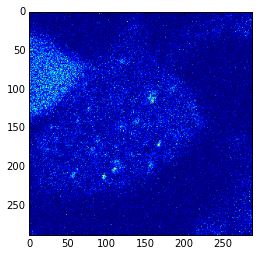

In [8]:
im_stack = imreadtiff('post-FancyFRAP.lsm',key=2)
#Experiment with different keys to view different slices of the image.
imshow(im_stack[1,:,:])

#Notice the dimensions and data type.
print('image dimensions',im_stack.shape, ' im dtype:',im_stack.dtype)

#It is often easier to open an image in Fiji before attempting to open it
#in python.
#This particular file contains thumbnail images in every other frame, which
#make normal automation tricky.

#Final challenge.
#Find images of the same size and then take a maximum project of the image.

Dominic Waithe 2015 (c)